In [31]:
from __future__ import print_function

from retrieve_data import *

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from matplotlib.ticker import Formatter
from matplotlib.dates import bytespdate2num, num2date

class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return 'Date'

        return num2date(self.dates[ind]).strftime(self.fmt)

class CandleIndicators:
    """Group of custom candle-based indicator features""" 
    def HigherClose(self, dataSet, num_days, feature_dict):
        # Returns true if closing price greater than closeing price num_days previous
        column_name = str(num_days) + 'dHigherCls'
        nrows = dataSet.shape[0]
        pChg = np.zeros(nrows)
        p = dataSet.Pri
        for i in range (num_days,nrows):
            pChg[i] = p[i] > p[i-num_days]
        feature_dict[column_name] = 'Keep'
        dataSet[column_name] = pChg
        return dataSet, feature_dict
    
    def LowerClose(self,dataSet,num_days,feature_dict):
        # Returns true if closing price greater than closeing price num_days previous
        column_name = str(num_days) + 'dLowerCls'
        nrows = dataSet.shape[0]
        pChg = np.zeros(nrows)
        p = dataSet.Pri
        for i in range (num_days,nrows):
            pChg[i] = p[i] < p[i-num_days]
        feature_dict[column_name] = 'Keep'
        dataSet[column_name] = pChg
        return dataSet, feature_dict      
    
if __name__ == "__main__":
    from plot_utils import *
    dataLoadStartDate = "2014-04-01"
    dataLoadEndDate = "2018-04-01"
    issue = "TLT"
    feature_dict = {}
    
    candle_ind = CandleIndicators()
    plotIt = PlotUtility()
    dSet = DataRetrieve()
    dataSet = dSet.read_issue_data(issue)
    dataSet = dSet.set_date_range(dataSet, dataLoadStartDate,dataLoadEndDate)
    
    days_to_plot = 4
    for i in range(1,days_to_plot+1):
        num_days = i
        dataSet, feature_dict = candle_ind.HigherClose(dataSet,num_days,feature_dict)
        dataSet, feature_dict = candle_ind.LowerClose(dataSet,num_days,feature_dict)
    
    startDate = "2015-02-01"
    endDate = "2015-03-30"
    rsiDataSet = dataSet.ix[startDate:endDate]

Successfully retrieved data series for TLT


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [53]:
    fig, axes = plt.subplots(days_to_plot+1,
                             1, 
                             figsize=(15,8), 
                             sharex=True
                             )
    
    N = len(rsiDataSet)
    ind = np.arange(N)  # the evenly spaced plot indices    
    def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return rsiDataSet.Date[thisind].strftime('%Y-%m-%d')

    axes[0].plot(ind,rsiDataSet['Pri'], label=issue)
    for i in range(1,days_to_plot+1):
        axes[i].plot(ind,rsiDataSet[str(i) + 'dHigherCls'], label=str(i) + 'dHigherCls');



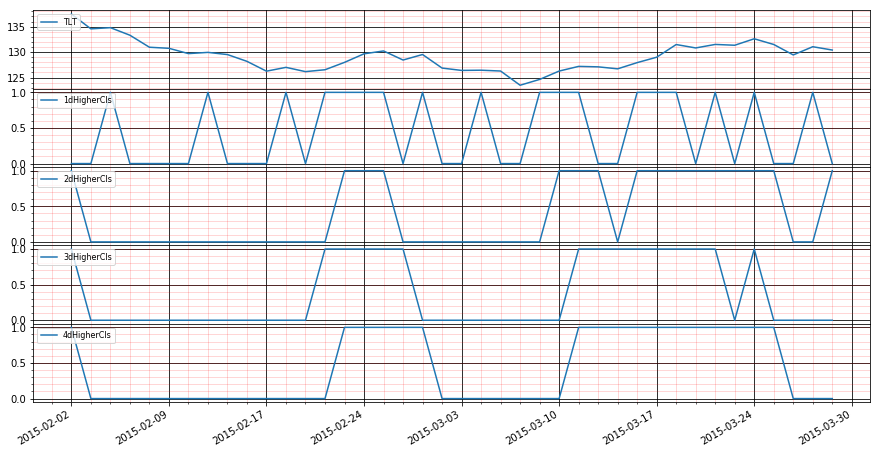

In [54]:
    # Bring subplots close to each other.
    plt.subplots_adjust(hspace=0)
    for ax in axes:
        ax.label_outer()
        ax.legend(loc='upper left', frameon=True, fontsize=8)
        #ax.grid(True, which='both')
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
        #ax.autoscale_view()
        ax.grid(b=True, which='major', color='k', linestyle='-')
        ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
        ax.minorticks_on() # KEEP
        #ax.tick_params(axis='y',which='minor',bottom='off')
        fig.autofmt_xdate() # angle of date, KEEP
    plt.show()

In [ ]:
I tend to use the following template

def plot_something(data, ax=None, **kwargs):
    ax = ax or plt.gca()
    # Do some cool data transformations...
    return ax.boxplot(data, **kwargs)
Then you can experiment with your plotting function by simply calling plot_something(my_data) and you can specify which axes to use like so.

fig, (ax1, ax2) = plt.subplots(2)
plot_something(data1, ax1, color='blue')
plot_something(data2, ax2, color='red')
Adding the kwargs allows you to pass in arbitrary parameters to the plotting function such as labels, line styles, or colours.

The line ax = ax or plt.gca() uses the axes you have specified or gets the current axes from matplotlib (which may be new axes if you haven't created any yet).